In [1]:
!pip install pycountry
!pip install pycountry_convert

In [2]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import pycountry
import pycountry_convert
from pycountry_convert import country_name_to_country_alpha3
import json
import requests
import gmaps
import os
from scipy.stats import chi2_contingency
from config import tg_key
import seaborn as sns

In [3]:
#import csv files and turn into dataframes
whr = pd.read_csv("Resources/WHR_2020.csv")
netf = pd.read_csv("Resources/Netflix_all.csv")

In [4]:
#view World Happiness Report dataframe
whr.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [5]:
#view Netflix dataframe
netf.head()

,week,show_type,title,ori_country,genre,release_date,is_NF_Ori,imdb_rating,rt_rating,country_chart,show_link,Continent,rel_yr,rel_mt
0,37,Movie,The Grinch,USA,Action,2018-11-09,False,63,58,EGY,https://flixpatrol.com/title/dr-seuss-how-the-...,AFR,2018,11
1,37,TV Show,Lucifer,USA,Superhero,2016-01-25,True,83,87,EGY,https://flixpatrol.com/title/lucifer,AFR,2016,1
2,36,Movie,Scarecrow,Egypt,Unknown,2019-01-01,False,0,0,EGY,https://flixpatrol.com/title/scarecrow-2019,AFR,2019,1
3,36,TV Show,Lucifer,USA,Superhero,2016-01-25,True,83,87,EGY,https://flixpatrol.com/title/lucifer,AFR,2016,1
4,35,Movie,Project Power,USA,Action,2020-08-14,True,61,63,EGY,https://flixpatrol.com/title/project-power,AFR,2020,8


In [6]:
#view list of countries
netf.country_chart.unique()

array(['EGY', 'NGA', 'POR', 'ARG', 'KOR', 'PHL', 'GTM', 'COL', 'JOR',
       'BGD', 'THA', 'FIN', 'PRY', 'PAN', 'ROU', 'NOR', 'MEX', 'AUT',
       'URY', 'LVA', 'SGP', 'IND', 'POL', 'SWE', 'HRV', 'LBN', 'CHE',
       'MYS', 'LKA', 'VNM', 'BEL', 'DOM', 'BGR', 'AUS', 'ITA', 'PAK',
       'NZE', 'QAT', 'HUN', 'HKG', 'TWN', 'SAU', 'DEU', 'CHL', 'ECU',
       'SVN', 'FRA', 'RUS', 'TUR', 'GBR', 'UKR', 'CZE', 'ZAF', 'CAN',
       'BOL', 'ISL', 'CYP', 'VEN', 'USA', 'HND', 'BRA', 'EST', 'GRE',
       'KWT', 'NLD', 'ESP', 'NIC', 'DNK', 'PER', 'MAR', 'IRE', 'JPN',
       'ISR', 'OMN', 'SVK', 'LTU', 'ARE', 'CRI', 'IDN'], dtype=object)

In [7]:
#convert country names in WHR into ALPHA3 using pycountry which will be used for merge to netflix dataframe
def do_fuzzy_search(country):
    try:
        result = pycountry.countries.search_fuzzy(country)
        return result[0].alpha_3
    except:
        print(f"{country} not found")
        return np.nan
whr["country_code"] = whr["Country name"].apply(lambda country: do_fuzzy_search(country))

Taiwan Province of China not found
South Korea not found
North Cyprus not found
Hong Kong S.A.R. of China not found
Ivory Coast not found
Congo (Brazzaville) not found
Laos not found
Palestinian Territories not found
Congo (Kinshasa) not found
Swaziland not found


In [8]:
#check to see if the alpha 3 column (county_code) was added
whr.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,country_code
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,FIN
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,DNK
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,CHE
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,ISL
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,NOR


In [9]:
#count of the different show types
netf["show_type"].value_counts()

Movie             1483
TV Show           1384
Documentary TV     130
Documentary         28
Short                3
Name: show_type, dtype: int64

In [10]:
#rename country_chart to country_code in netflix dataframe for the later merge
netf_clean = netf.rename(columns = {"country_chart": "country_code"} )

In [11]:
#filter by movies only
netf_movies = netf_clean.loc[netf["show_type"] == "Movie"]

In [12]:
netf_clean

,week,show_type,title,ori_country,genre,release_date,is_NF_Ori,imdb_rating,rt_rating,country_code,show_link,Continent,rel_yr,rel_mt
0,37,Movie,The Grinch,USA,Action,2018-11-09,False,63,58,EGY,https://flixpatrol.com/title/dr-seuss-how-the-...,AFR,2018,11
1,37,TV Show,Lucifer,USA,Superhero,2016-01-25,True,83,87,EGY,https://flixpatrol.com/title/lucifer,AFR,2016,1
2,36,Movie,Scarecrow,Egypt,Unknown,2019-01-01,False,0,0,EGY,https://flixpatrol.com/title/scarecrow-2019,AFR,2019,1
3,36,TV Show,Lucifer,USA,Superhero,2016-01-25,True,83,87,EGY,https://flixpatrol.com/title/lucifer,AFR,2016,1
4,35,Movie,Project Power,USA,Action,2020-08-14,True,61,63,EGY,https://flixpatrol.com/title/project-power,AFR,2020,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,19,TV Show,Outer Banks,USA,Mystery,2020-04-15,True,80,70,IDN,https://flixpatrol.com/title/outer-banks,ASI,2020,4
3024,18,Movie,5Gang: A different kind of Christmas,Romania,Unknown,2019-01-01,False,15,0,IDN,https://flixpatrol.com/title/5gang-a-different...,ASI,2019,1
3025,18,TV Show,Never Have I Ever,USA,Comedy,2020-04-27,True,78,98,IDN,https://flixpatrol.com/title/never-have-i-ever,ASI,2020,4
3026,17,Movie,Extraction,USA,Action,2020-04-24,True,70,68,IDN,https://flixpatrol.com/title/extraction-2020,ASI,2020,4


In [13]:
netf_movies.head()

,week,show_type,title,ori_country,genre,release_date,is_NF_Ori,imdb_rating,rt_rating,country_code,show_link,Continent,rel_yr,rel_mt
0,37,Movie,The Grinch,USA,Action,2018-11-09,False,63,58,EGY,https://flixpatrol.com/title/dr-seuss-how-the-...,AFR,2018,11
2,36,Movie,Scarecrow,Egypt,Unknown,2019-01-01,False,0,0,EGY,https://flixpatrol.com/title/scarecrow-2019,AFR,2019,1
4,35,Movie,Project Power,USA,Action,2020-08-14,True,61,63,EGY,https://flixpatrol.com/title/project-power,AFR,2020,8
6,34,Movie,Project Power,USA,Action,2020-08-14,True,61,63,EGY,https://flixpatrol.com/title/project-power,AFR,2020,8
8,33,Movie,No Surrender,Egypt,Unknown,1900-01-01,False,0,0,EGY,https://flixpatrol.com/title/no-surrender-0,AFR,1900,1


In [14]:
netf_movies.count()

week            1483
show_type       1483
title           1483
ori_country     1483
genre           1483
release_date    1483
is_NF_Ori       1483
imdb_rating     1483
rt_rating       1483
country_code    1483
show_link       1483
Continent       1483
rel_yr          1483
rel_mt          1483
dtype: int64

In [15]:
#merge datafiles on country_code column with an outer join
merge = pd.merge(whr, netf_movies, on = "country_code", how = "outer")

In [16]:
#checking to see if it merged ok
merge.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'country_code', 'week', 'show_type', 'title',
       'ori_country', 'genre', 'release_date', 'is_NF_Ori', 'imdb_rating',
       'rt_rating', 'show_link', 'Continent', 'rel_yr', 'rel_mt'],
      dtype='object')

In [17]:
contagion = merge[merge["title"]=="Contagion"]
contagion_pd = pd.DataFrame({"Week":contagion["week"]})
contagion_pd

,Week
213,12.0
261,15.0
286,13.0
979,17.0
980,16.0
982,14.0
1566,15.0


In [18]:
# Creating bin to identify Covid-Lockdown
bins = [0, 11, 23, 25, 37]

# Labels for these bins
group_labels = ["Pre-Lockdown", "Covid-Lockdown","Break", "Easing"]

#Cut labels and add a column
merge["Covid_Lockdown"] = pd.cut(merge["week"], bins, labels = group_labels, include_lowest=True)


In [19]:
covid_pd = merge[merge["Covid_Lockdown"]=="Covid-Lockdown"]
easing_pd = merge[merge["Covid_Lockdown"]=="Easing"]

,Genre,Covid Lockdown,Covid Easing
Action,16,21.825397,21.597300
Adventure,16,1.190476,1.462317
Animated,16,3.968254,5.511811
Comedy,16,28.571429,24.521935
Crime,16,5.158730,3.037120
Drama,16,5.357143,6.524184
Fantasy,16,2.380952,0.674916
Horror,16,2.182540,2.474691
Musical,16,0.000000,0.112486
Romance,16,0.992063,14.623172


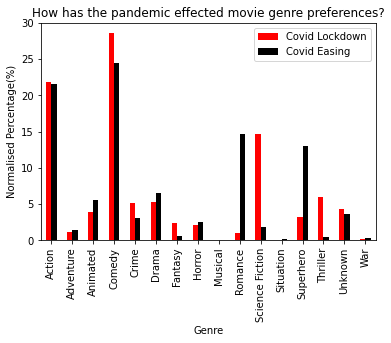

In [20]:
CC = covid_pd["genre"].value_counts()/len(covid_pd["genre"])*100
EC = easing_pd["genre"].value_counts()/len(easing_pd["genre"])*100
index = merge["genre"].nunique()
df = pd.DataFrame({"Genre":str(index),"Covid Lockdown": CC,
                   "Covid Easing": EC})
df = df.fillna(0)
ax = df.plot.bar(color =("red","black"), title ="How has the pandemic effected movie genre preferences?")
ax.set_xlabel("Genre")
ax.set_ylabel("Normalised Percentage(%)")
df

In [21]:
CC1 = covid_pd["genre"].value_counts()
EC1 = easing_pd["genre"].value_counts()
index = merge["genre"].nunique()
df1 = pd.DataFrame({"Genre":str(index),"Covid Lockdown": CC1,
                   "Covid Easing": EC1})
df1 = df1.fillna(0)
df1

,Genre,Covid Lockdown,Covid Easing
Action,16,110.0,192
Adventure,16,6.0,13
Animated,16,20.0,49
Comedy,16,144.0,218
Crime,16,26.0,27
Drama,16,27.0,58
Fantasy,16,12.0,6
Horror,16,11.0,22
Musical,16,0.0,1
Romance,16,5.0,130


In [22]:
st.f_oneway(df1["Covid Lockdown"], df["Covid Easing"])

F_onewayResult(statistic=5.637504550284145, pvalue=0.024176878527762978)

In [23]:
critical_value = st.chi2.ppf(q = 0.95, df = 15)
critical_value

24.995790139728616

In [24]:
covid_pd["Lat"] = ""
covid_pd["Long"] = ""

C:\Users\maco_\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\maco_\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
gkey = tg_key


# Build URL using the Google Maps API
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

for index, row in covid_pd.iterrows():
    try:
        country_code = row["Country name"]
        params = {"address": country_code, "key": gkey}
        # Run request
        response = requests.get(base_url, params=params)


        # Convert to JSON
        countrylat_long= response.json()

        # Extract lat/lng
        covid_pd.loc[index, "Lat"] = countrylat_long["results"][0]["geometry"]["location"]["lat"]
        covid_pd.loc[index,"Long"] = countrylat_long["results"][0]["geometry"]["location"]["lng"]

    except:
        print(f"{country_code} not found. Skipping..")


C:\Users\maco_\anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [26]:
covid_pd.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,is_NF_Ori,imdb_rating,rt_rating,show_link,Continent,rel_yr,rel_mt,Covid_Lockdown,Lat,Long
14,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,...,False,66.0,34.0,https://flixpatrol.com/title/johnny-english-3,EUR,2018.0,9.0,Covid-Lockdown,61.9241,25.7482
15,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,...,False,66.0,34.0,https://flixpatrol.com/title/johnny-english-3,EUR,2018.0,9.0,Covid-Lockdown,61.9241,25.7482
16,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,...,False,73.0,93.0,https://flixpatrol.com/title/bumblebee,EUR,2018.0,12.0,Covid-Lockdown,61.9241,25.7482
17,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,...,True,56.0,25.0,https://flixpatrol.com/title/the-wrong-missy,EUR,2020.0,5.0,Covid-Lockdown,61.9241,25.7482
18,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,...,True,57.0,41.0,https://flixpatrol.com/title/dangerous-lies,EUR,2020.0,4.0,Covid-Lockdown,61.9241,25.7482


In [27]:
# Configure gmaps
gmaps.configure(api_key=gkey)
# Store latitude and longitude in locations
locations = covid_pd[["Lat", "Long"]]
happiness = covid_pd["Ladder score"].astype(float)

In [28]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=happiness, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=5, gradient = ["#ff0000","#ff8533","#ffff00"])
# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
latlong = covid_pd.drop_duplicates(subset=["Country name"], keep = "last")
sf = covid_pd.groupby(["Country name"])["genre"].agg(pd.Series.mode)
popular_df = pd.DataFrame({"Country name":sf.index, "Genre":sf.values})
combined = pd.merge(popular_df,latlong, how="inner",on="Country name")
combined.head()

,Country name,Genre,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,is_NF_Ori,imdb_rating,rt_rating,show_link,Continent,rel_yr,rel_mt,Covid_Lockdown,Lat,Long
0,Argentina,Comedy,Latin America and Caribbean,5.9747,0.053442,6.079446,5.869954,9.810955,0.900568,68.803802,...,True,55.0,34.0,https://flixpatrol.com/title/love-wedding-repeat,AME,2020.0,4.0,Covid-Lockdown,-38.4161,-63.6167
1,Australia,"[Action, Comedy]",North America and ANZ,7.2228,0.041841,7.304808,7.140791,10.720596,0.944855,73.604538,...,True,73.0,0.0,https://flixpatrol.com/title/the-platform,OCE,2020.0,3.0,Covid-Lockdown,-25.2744,133.775
2,Austria,"[Comedy, Science Fiction]",Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,...,True,73.0,0.0,https://flixpatrol.com/title/the-platform,EUR,2020.0,3.0,Covid-Lockdown,47.5162,14.5501
3,Belgium,Comedy,Western Europe,6.8635,0.034370,6.930866,6.796134,10.673639,0.911633,72.001648,...,True,73.0,0.0,https://flixpatrol.com/title/the-platform,EUR,2020.0,3.0,Covid-Lockdown,50.5039,4.46994
4,Bolivia,Comedy,Latin America and Caribbean,5.7475,0.050645,5.846765,5.648235,8.851115,0.803109,63.600471,...,True,73.0,0.0,https://flixpatrol.com/title/the-platform,AME,2020.0,3.0,Covid-Lockdown,-16.2902,-63.5887


In [30]:
# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Most Popular Genre</dt><dd>{Genre}</dd>
<dt>Country</dt><dd>{Country name}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
covid_info = [info_box_template.format(**row) for index, row in combined.iterrows()]
locations = combined[["Lat", "Long"]]

In [31]:
# Add marker layer ontop of heat map
markers = gmaps.marker_layer(locations, info_box_content = covid_info)

# Display figure
fig.add_layer(markers)
fig


Figure(layout=FigureLayout(height='420px'))

In [32]:
merge["Lat"] = ""
merge["Long"] = ""
merge.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,is_NF_Ori,imdb_rating,rt_rating,show_link,Continent,rel_yr,rel_mt,Covid_Lockdown,Lat,Long
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,...,False,53.0,15.0,https://flixpatrol.com/title/robin-hood-2018,EUR,2018.0,9.0,Easing,,
1,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,...,False,89.0,68.0,https://flixpatrol.com/title/joker-2019,EUR,2019.0,10.0,Easing,,
2,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,...,True,61.0,63.0,https://flixpatrol.com/title/project-power,EUR,2020.0,8.0,Easing,,
3,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,...,True,61.0,63.0,https://flixpatrol.com/title/project-power,EUR,2020.0,8.0,Easing,,
4,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,...,True,61.0,0.0,https://flixpatrol.com/title/work-it-2020,EUR,2020.0,8.0,Easing,,


In [33]:
# Build URL using the Google Maps API
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

for index, row in merge.iterrows():
    try:
        country_code = row["Country name"]
        params = {"address": country_code, "key": gkey}
        # Run request
        response = requests.get(base_url, params=params)


        # Convert to JSON
        countrylat_long= response.json()

        # Extract lat/lng
        merge.loc[index, "Lat"] = countrylat_long["results"][0]["geometry"]["location"]["lat"]
        merge.loc[index,"Long"] = countrylat_long["results"][0]["geometry"]["location"]["lng"]

    except:
        print(f"{country_code} not found. Skipping..")

In [34]:
merge.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,is_NF_Ori,imdb_rating,rt_rating,show_link,Continent,rel_yr,rel_mt,Covid_Lockdown,Lat,Long
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,...,False,53.0,15.0,https://flixpatrol.com/title/robin-hood-2018,EUR,2018.0,9.0,Easing,61.9241,25.7482
1,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,...,False,89.0,68.0,https://flixpatrol.com/title/joker-2019,EUR,2019.0,10.0,Easing,61.9241,25.7482
2,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,...,True,61.0,63.0,https://flixpatrol.com/title/project-power,EUR,2020.0,8.0,Easing,61.9241,25.7482
3,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,...,True,61.0,63.0,https://flixpatrol.com/title/project-power,EUR,2020.0,8.0,Easing,61.9241,25.7482
4,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.95433,71.900825,0.949172,...,True,61.0,0.0,https://flixpatrol.com/title/work-it-2020,EUR,2020.0,8.0,Easing,61.9241,25.7482


In [35]:
# Configure gmaps
gmaps.configure(api_key=gkey)
# Store latitude and longitude in locations
locations1 = merge[["Lat", "Long"]]
happiness1 = merge["Ladder score"].astype(float)

In [36]:
# Plot Heatmap
fig1 = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations1, weights=happiness1, 
                                 dissipating=False, max_intensity=100,
                                 point_radius=5,gradient = ["#000000","#ffff00"])


# Add layer
fig1.add_layer(heat_layer)

# Display figure
fig1

Figure(layout=FigureLayout(height='420px'))

In [37]:
#convert any blanks in genre to null
merge_null = merge[merge["genre"].isnull()]

In [38]:
merge_null.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'country_code', 'week', 'show_type', 'title',
       'ori_country', 'genre', 'release_date', 'is_NF_Ori', 'imdb_rating',
       'rt_rating', 'show_link', 'Continent', 'rel_yr', 'rel_mt',
       'Covid_Lockdown', 'Lat', 'Long'],
      dtype='object')

In [39]:
#drop any rows that do not have WHR data and Netflix data
merge_clean = merge.dropna(how = "any")

In [40]:
#check to see if it worked ok
merge_clean

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,is_NF_Ori,imdb_rating,rt_rating,show_link,Continent,rel_yr,rel_mt,Covid_Lockdown,Lat,Long
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,False,53.0,15.0,https://flixpatrol.com/title/robin-hood-2018,EUR,2018.0,9.0,Easing,61.9241,25.7482
1,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,False,89.0,68.0,https://flixpatrol.com/title/joker-2019,EUR,2019.0,10.0,Easing,61.9241,25.7482
2,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,True,61.0,63.0,https://flixpatrol.com/title/project-power,EUR,2020.0,8.0,Easing,61.9241,25.7482
3,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,True,61.0,63.0,https://flixpatrol.com/title/project-power,EUR,2020.0,8.0,Easing,61.9241,25.7482
4,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,True,61.0,0.0,https://flixpatrol.com/title/work-it-2020,EUR,2020.0,8.0,Easing,61.9241,25.7482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,India,South Asia,3.5733,0.027702,3.627596,3.519003,8.849824,0.592201,60.215187,0.881445,...,False,54.0,17.0,https://flixpatrol.com/title/love-aaj-kal-2020,ASI,2020.0,2.0,Covid-Lockdown,20.5937,78.9629
1384,India,South Asia,3.5733,0.027702,3.627596,3.519003,8.849824,0.592201,60.215187,0.881445,...,True,28.0,0.0,https://flixpatrol.com/title/mrs-serial-killer,ASI,2020.0,5.0,Covid-Lockdown,20.5937,78.9629
1385,India,South Asia,3.5733,0.027702,3.627596,3.519003,8.849824,0.592201,60.215187,0.881445,...,True,70.0,68.0,https://flixpatrol.com/title/extraction-2020,ASI,2020.0,4.0,Covid-Lockdown,20.5937,78.9629
1386,India,South Asia,3.5733,0.027702,3.627596,3.519003,8.849824,0.592201,60.215187,0.881445,...,True,70.0,68.0,https://flixpatrol.com/title/extraction-2020,ASI,2020.0,4.0,Covid-Lockdown,20.5937,78.9629


In [41]:
#groupby to detemine the most watched movie genre per country
most_common = merge_clean.groupby(["Country name", "Regional indicator", "Ladder score", "Perceptions of corruption", "genre", "country_code"]).agg({"genre" : ["count"]})
#rename count column to Total
most_common.columns = ["Total"]
most_common.head(10)

Total
Country name Regional indicator          Ladder score Perceptions of corruption genre     country_code       
Argentina    Latin America and Caribbean 5.9747       0.842010                  Action    ARG               4
                                                                                Animated  ARG               2
                                                                                Comedy    ARG               5
                                                                                Crime     ARG               5
                                                                                Drama     ARG               2
                                                                                Romance   ARG               3
                                                                                Superhero ARG               1
Australia    North America and ANZ       7.2228       0.415169                  Action    AUS               4
                                                                                Adventure AUS               1
                                                                                Animated  AUS               2

In [42]:
#rests the index to remove the groupby
most_common_reset = most_common.reset_index()

#sorts by most common genre for the country and drops the remanining
mc_group = most_common_reset.sort_values("Total", ascending = False).drop_duplicates(["Country name"],keep = "first")

#new dataframe after sorting by Ladder score.
top = mc_group.sort_values(by = ["Ladder score"], ascending = False)

#displays top 10 countries
top.head(10)

,Country name,Regional indicator,Ladder score,Perceptions of corruption,genre,country_code,Total
152,Finland,Western Europe,7.8087,0.195445,Comedy,FIN,6
112,Denmark,Western Europe,7.6456,0.168489,Comedy,DNK,7
432,Switzerland,Western Europe,7.5599,0.303728,Romance,CHE,6
196,Iceland,Western Europe,7.5045,0.711710,Comedy,ISL,7
312,Norway,Western Europe,7.4880,0.263218,Comedy,NOR,8
276,Netherlands,Western Europe,7.4489,0.364717,Action,NLD,7
421,Sweden,Western Europe,7.3535,0.250880,Comedy,SWE,7
19,Austria,Western Europe,7.2942,0.499955,Action,AUT,6
64,Canada,North America and ANZ,7.2321,0.390843,Comedy,CAN,11
10,Australia,North America and ANZ,7.2228,0.415169,Comedy,AUS,6


In [43]:
#displays bottom 10 countries
top.tail(10)

,Country name,Regional indicator,Ladder score,Perceptions of corruption,genre,country_code,Total
296,Niger,Sub-Saharan Africa,4.9096,0.722530,Comedy,NGA,4
28,Bangladesh,South Asia,4.8328,0.661844,Horror,BGD,1
401,South Africa,Sub-Saharan Africa,4.8141,0.843424,Comedy,ZAF,10
248,Lebanon,Middle East and North Africa,4.7715,0.902256,Action,LBN,2
304,Nigeria,Sub-Saharan Africa,4.7241,0.861874,Drama,NGA,4
234,Jordan,Middle East and North Africa,4.6334,0.700344,Action,JOR,2
454,Ukraine,Commonwealth of Independent States,4.5607,0.920637,Comedy,UKR,10
415,Sri Lanka,South Asia,4.3270,0.859002,Action,LKA,1
136,Egypt,Middle East and North Africa,4.1514,0.787727,Action,EGY,6
202,India,South Asia,3.5733,0.772043,Drama,IND,5


In [44]:
#new dataframe based on sorting by Perceptions of corruption
corruption = mc_group.sort_values(by = ["Perceptions of corruption"], ascending = False)
#display top 20 countries by Perceptions of corruption score
corruption.head(20)

,Country name,Regional indicator,Ladder score,Perceptions of corruption,genre,country_code,Total
59,Bulgaria,Central and Eastern Europe,5.1015,0.935585,Romance,BGR,7
357,Romania,Central and Eastern Europe,6.1237,0.934300,Comedy,ROU,8
454,Ukraine,Commonwealth of Independent States,4.5607,0.920637,Comedy,UKR,10
389,Slovakia,Central and Eastern Europe,6.2806,0.918096,Romance,SVK,7
92,Croatia,Central and Eastern Europe,5.5047,0.916495,Comedy,HRV,4
248,Lebanon,Middle East and North Africa,4.7715,0.902256,Action,LBN,2
333,Peru,Latin America and Caribbean,5.7968,0.893715,Action,PER,4
189,Hungary,Central and Eastern Europe,6.0004,0.892917,Comedy,HUN,8
442,Thailand,Southeast Asia,5.9988,0.886272,Unknown,THA,9
209,Indonesia,Southeast Asia,5.2856,0.876296,Unknown,IDN,1


In [45]:
#puts genre into a list for for loop and later for plot labels
genres = mc_group["genre"].sort_values(ascending = True).unique()

#creates empty list to fill with ladder score and perceptions of corruption for plotting
ladder_score = []
perceptions_of_corruption = []

plot_happiness = []
plot_corruption = []

#use of for loop to use the values in genre to filter the data
for x in genres:

#uses the values in genre to filter the list    
    g_filter = mc_group[(mc_group["genre"] == x)]

#creates list from the ladder score and perceptions of corruption
    ladder_score = g_filter["Ladder score"]
    perceptions_of_corruption = g_filter["Perceptions of corruption"]
#saves this into another list to be able to plot all graphs on the same plot    
    plot_happiness.append(ladder_score)
    plot_corruption.append(perceptions_of_corruption)  
   
    #ladder Score
#sets the quantiles
    l_quartiles = ladder_score.quantile([.25,.5,.75])
#finds lower quantile
    l_lowerq = l_quartiles[0.25]
#finds upper quantile
    l_upperq = l_quartiles[0.75]
#finds the interquartile range    
    l_iqr = l_upperq - l_lowerq
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    print("-------------------")
    print("Ladder Score")
    print("-------------------")
    print(f"{x}")
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    print(f"The lower quartile of {x} is: {l_lowerq}")
    print(f"The upper quartile of {x} is: {l_upperq}")
    print(f"The interquartile range of {x} is: {l_iqr}")
    print(f"The the median of {x} is: {l_quartiles[0.5]} ")
    print("-------------------")
#determines the lower and upper bounds using the lower and upper quantile and iqr
    l_lower_bound = l_lowerq - (1.5*l_iqr)
    l_upper_bound = l_upperq + (1.5*l_iqr)

# Determine outliers using upper and lower bounds
    print(f"Values below {l_lower_bound} could be outliers for {x}.")
    print(f"Values above {l_upper_bound} could be outliers for {x}.")  
    
    #Perceptions of Corruption 
#sets the quantiles
    p_quartiles = perceptions_of_corruption.quantile([.25,.5,.75])
#finds lower quantile
    p_lowerq = p_quartiles[0.25]
#finds upper quantile
    p_upperq = p_quartiles[0.75]
#finds the interquartile range    
    p_iqr = p_upperq - p_lowerq
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    print("Perception of Corruption")
    print("-------------------")
    print(f"{x}")
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    print(f"The lower quartile of {x} is: {p_lowerq}")
    print(f"The upper quartile of {x} is: {p_upperq}")
    print(f"The interquartile range of {x} is: {p_iqr}")
    print(f"The median of {x} is: {p_quartiles[0.5]} ")
    print("-------------------")
#determines the lower and upper bounds using the lower and upper quantile and iqr
    p_lower_bound = p_lowerq - (1.5*p_iqr)
    p_upper_bound = p_upperq + (1.5*p_iqr)

# Determine outliers using upper and lower bounds
    print(f"Values below {p_lower_bound} could be outliers for {x}.")
    print(f"Values above {p_upper_bound} could be outliers for {x}.")    

-------------------
Ladder Score
-------------------
Action
The lower quartile of Action is: 5.424725175
The upper quartile of Action is: 6.4298001527499995
The interquartile range of Action is: 1.0050749777499997
The the median of Action is: 5.9391999245 
-------------------
Values below 3.9171127083750004 could be outliers for Action.
Values above 7.937412619374999 could be outliers for Action.
Perception of Corruption
-------------------
Action
The lower quartile of Action is: 0.652081683
The upper quartile of Action is: 0.848517254
The interquartile range of Action is: 0.19643557099999998
The median of Action is: 0.7920740545 
-------------------
Values below 0.35742832650000006 could be outliers for Action.
Values above 1.1431706105 could be outliers for Action.
-------------------
Ladder Score
-------------------
Animated
The lower quartile of Animated is: 6.13710022
The upper quartile of Animated is: 6.13710022
The interquartile range of Animated is: 0.0
The the median of Animat

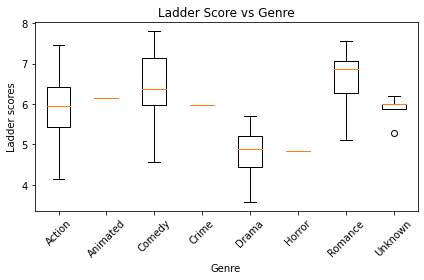

In [46]:
#plots each of the boxplots from the plot_happiness list created above druing the loop  
fig1, ax1 = plt.subplots()
ax1.boxplot(plot_happiness)

#sets the x labels using the names from the genre list
plt.xticks([1,2,3,4,5,6,7,8], genres, rotation = 45)
#sets the title and y label
ax1.set_xlabel("Genre")
ax1.set_ylabel("Ladder scores")
ax1.set_title("Ladder Score vs Genre")
plt.tight_layout()

#saves the plot as a png
plt.savefig("Plot Images/Ladder Score vs Genre Box Plot.png")

plt.show(block = True) 

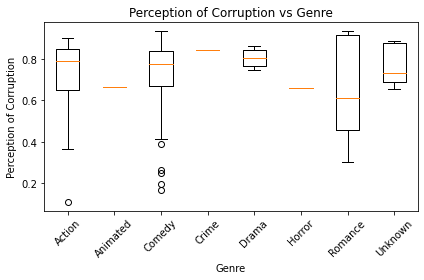

In [47]:
#plots each of the boxplots from the plot_corruption list created above druing the loop 
fig2, ax2 = plt.subplots()
ax2.boxplot(plot_corruption)

#sets the x labels using the names from the genre list
plt.xticks([1,2,3,4,5,6,7,8], genres, rotation = 45)
#sets the title and y label
ax2.set_xlabel("Genre")
ax2.set_ylabel("Perception of Corruption")
ax2.set_title("Perception of Corruption vs Genre")
plt.tight_layout()

#saves the plot as a png
plt.savefig("Plot Images/Perception of Corruption vs Genre Box Plot.png")

plt.show(block = True)   

In [48]:
#group by genre and find the sum and mean of Ladder score and Perceptions of Corruption
genre_aggregate = mc_group.groupby("genre").agg({"Ladder score": ["sum", "mean"], "Perceptions of corruption" : ["sum", "mean"], "Country name" : ["count"]})

#resets the index
genre_agg = genre_aggregate.reset_index()

#renames the columns to make them easier to read
genre_agg.columns = ["Genre","Ladder Score Tally", "Ladder Score Average", "Corruption Score Tally", 'Corruption Score Average', "Total Countries"]
genre_agg

,Genre,Ladder Score Tally,Ladder Score Average,Corruption Score Tally,Corruption Score Average,Total Countries
0,Action,130.227001,5.919409,15.910910,0.723223,22
1,Animated,6.137100,6.137100,0.665950,0.665950,1
2,Comedy,203.361799,6.355056,22.187494,0.693359,32
3,Crime,5.974700,5.974700,0.842010,0.842010,1
4,Drama,19.043900,4.760975,3.216661,0.804165,4
5,Horror,4.832800,4.832800,0.661844,0.661844,1
6,Romance,32.881300,6.576260,3.226130,0.645226,5
7,Unknown,29.347500,5.869500,3.837688,0.767538,5


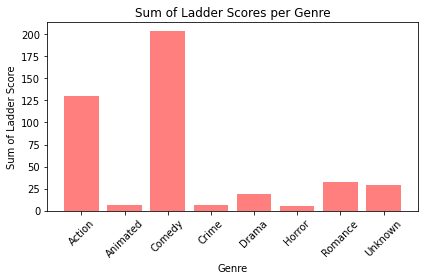

In [49]:
#plot the Sum of Ladder score of each genre  as bar plot

#sets the x_axis using the length of genre_agg
x_axis = np.arange(len(genre_agg))

#sets tick locations using the x_axis figures
tick_locations = [value for value in x_axis]

#bar plot using ladder score tally column as y axis figure
plt.bar(x_axis, genre_agg["Ladder Score Tally"], color='r', alpha=0.5, align="center")

#sets the ticks, x and y label and the title
plt.xticks(tick_locations, genre_agg["Genre"], rotation="45")
plt.xlabel("Genre")
plt.ylabel("Sum of Ladder Score")
plt.title("Sum of Ladder Scores per Genre")
plt.tight_layout()

#saves the plot as a png
plt.savefig("Plot Images/Sum of Ladder Scores per Genre.png")


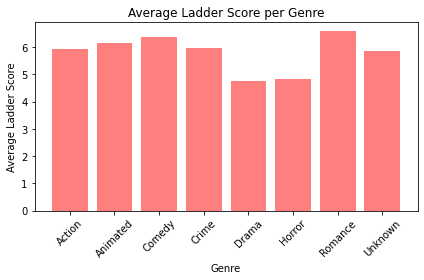

In [50]:
#plot the average Ladder score of each genre  as bar plot

#sets the x_axis using the length of genre_agg
x_axis = np.arange(len(genre_agg))

#sets tick locations using the x_axis figures
tick_locations = [value for value in x_axis]

#bar plot using ladder score average column as y axis figure
plt.bar(x_axis, genre_agg["Ladder Score Average"], color='r', alpha=0.5, align="center")

#sets the ticks, x and y label and the title
plt.xticks(tick_locations, genre_agg["Genre"], rotation="45")
plt.xlabel("Genre")
plt.ylabel("Average Ladder Score")
plt.title("Average Ladder Score per Genre")
plt.tight_layout()

#saves the plot as a png
plt.savefig("Plot Images/Average Ladder Scores per Genre.png")


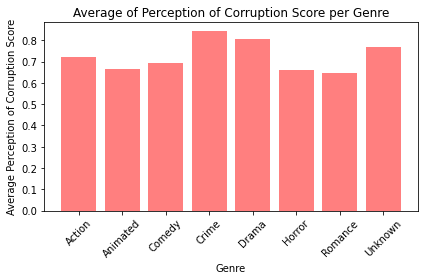

In [51]:
#plot the average corruption score of each genre  as bar plot

#sets the x_axis using the length of genre_agg
x_axis = np.arange(len(genre_agg))

#sets tick locations using the x_axis figures
tick_locations = [value for value in x_axis]

#bar plot using corruption score average column as y axis figure
plt.bar(x_axis, genre_agg["Corruption Score Average"], color='r', alpha=0.5, align="center")

#sets the ticks, x and y label and the title
plt.xticks(tick_locations, genre_agg["Genre"], rotation="45")
plt.xlabel("Genre")
plt.ylabel("Average Perception of Corruption Score")
plt.title("Average of Perception of Corruption Score per Genre")
plt.tight_layout()

#saves the plot as a png
plt.savefig("Plot Images/Average Perception of Corruption Score per Genre.png")

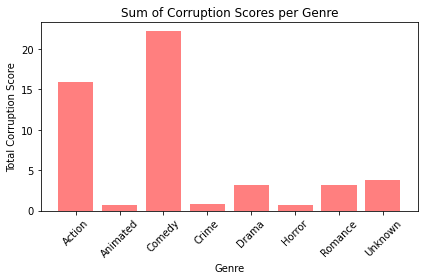

In [52]:
#plot the total corruption score of each genre as bar plot

#sets the x_axis using the length of genre_agg
x_axis = np.arange(len(genre_agg))

#sets tick locations using the x_axis figures
tick_locations = [value for value in x_axis]

#bar plot using corruption score tally column as y axis figure
plt.bar(x_axis, genre_agg["Corruption Score Tally"], color='r', alpha=0.5, align="center")

#sets the ticks, x and y label and the title
plt.xticks(tick_locations, genre_agg["Genre"], rotation="45")
plt.xlabel("Genre")
plt.ylabel("Total Corruption Score")
plt.title("Sum of Corruption Scores per Genre")
plt.tight_layout()

#saves the plot as a png
plt.savefig("Plot Images/Sum of Perception of Corruption Score per Genre.png")

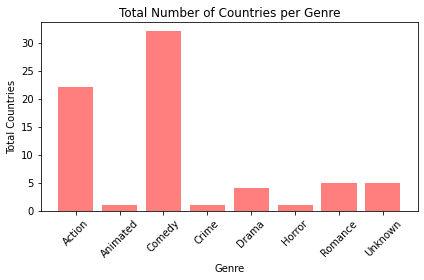

In [53]:
#plot total counts of each genre

#sets the x_axis using the length of genre_agg
x_axis = np.arange(len(genre_agg))

#sets tick locations using the x_axis figures
tick_locations = [value for value in x_axis]

#bar plot using total countries column as y axis figure
plt.bar(x_axis, genre_agg["Total Countries"], color='r', alpha=0.5, align="center")

#sets the ticks, x and y label and the title
plt.xticks(tick_locations, genre_agg["Genre"], rotation="45")
plt.xlabel("Genre")
plt.ylabel("Total Countries")
plt.title("Total Number of Countries per Genre")
plt.tight_layout()

#saves the plot as a png
plt.savefig("Plot Images/Total Number of Countries per Genre.png")

The correlation between Perceptions of Corruption and Ladder Score is -0.62


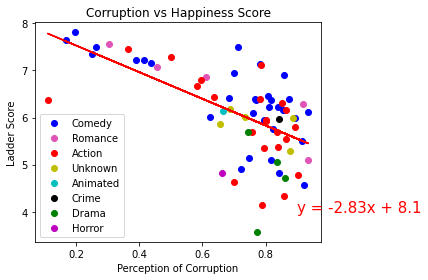

In [54]:
#plot out Perceptions of Corruption and Ladder Score

#set x and y values, x as perceptions of corruption and y as ladder score
x_values = top["Perceptions of corruption"]
y_values = top["Ladder score"]

#calculates the correlation coefficient
correlation = st.pearsonr(x_values,y_values)
#displays the correlation coefficient
print(f"The correlation between Perceptions of Corruption and Ladder Score is {round(correlation[0],2)}")

#calculates the linear regression and linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#sets the colours that will be used to colour code the scatter dots based on most popular genre
colours = {"Comedy" : "b", "Romance" : "#e055b7", "Action" : "r", "Unknown" : "y", 
           "Animated" : "c", "Crime" : "k", "Drama" : "g", "Horror" : "m"}

#use for loop to plot the colours by matching the colours list to the genre column
for idx in top['genre'].unique():
    plt.scatter(top[top["genre"]==idx]["Perceptions of corruption"], top[top["genre"]==idx]["Ladder score"], 
                c = colours[idx], label = idx )

#plots legend
plt.legend(loc = "best")

#plots the linear regression line
plt.plot(x_values,regress_values,"r-")

#plots the linear equation
plt.annotate(line_equation, (0.9, 4), fontsize=15, color="red")

#plot x and y label and title
plt.xlabel('Perception of Corruption')
plt.ylabel('Ladder Score')
plt.title("Corruption vs Happiness Score")
plt.tight_layout()

#saves the plot as a png
plt.savefig("Plot Images/Corruption vs Happiness Score.png")

plt.show()

In [55]:
#creates seperate dataframes based on genre filter
comedy = top[top["genre"] == "Comedy"]
romance = top[top["genre"] == "Romance"]
action = top[top["genre"] == "Action"]
unknown = top[top["genre"] == "Unknown"]
animated = top[top["genre"] == "Animated"]
crime = top[top["genre"] == "Crime"]
drama = top[top["genre"] == "Drama"]
horror = top[top["genre"] == "Horror"]

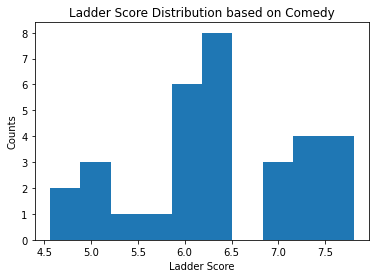

In [56]:
#plots histogram
plt.hist(comedy['Ladder score'])

#plots title and x and y labels
plt.title("Ladder Score Distribution based on Comedy")
plt.xlabel('Ladder Score')
plt.ylabel('Counts')

plt.show()

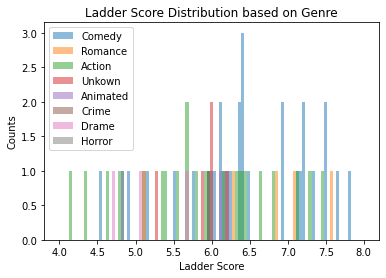

<Figure size 7200x1440 with 0 Axes>

In [57]:
#set bins for multiple histograms 
bins = np.linspace(4, 8, 100)

#plots multiple histogram based on 
plt.hist(comedy['Ladder score'], bins, alpha=0.5, label='Comedy')
plt.hist(romance['Ladder score'], bins, alpha=0.5, label='Romance')
plt.hist(action['Ladder score'], bins, alpha=0.5, label='Action')
plt.hist(unknown['Ladder score'], bins, alpha=0.5, label='Unkown')
plt.hist(animated['Ladder score'], bins, alpha=0.5, label='Animated')
plt.hist(crime['Ladder score'], bins, alpha=0.5, label='Crime')
plt.hist(drama['Ladder score'], bins, alpha=0.5, label='Drame')
plt.hist(horror['Ladder score'], bins, alpha=0.5, label='Horror')
plt.legend(loc='best')
plt.ylabel("Counts")
plt.xlabel("Ladder Score")
plt.title("Ladder Score Distribution based on Genre")
plt.figure(figsize = (100, 20))
plt.show()

In [58]:
#group by regional indicator and genre and finding the sum and mean of the ladder score and perceptions of corruption
region_fave_all = top.groupby(["Regional indicator", "genre"]).agg({"Ladder score" : ["sum", "mean"], "genre" : ["count"], "Perceptions of corruption" : ["sum", "mean"]})

#rename columns of region_fave
region_fave_all.columns = ["Total Ladder Score", "Average Ladder Score", "Count", "Total Corruption Score", "Average Corruption Score"]

#display to see results
region_fave_all

Total Ladder Score  \
Regional indicator                 genre                          
Central and Eastern Europe         Comedy               49.0904   
                                   Romance              11.3821   
                                   Unknown               6.1863   
Commonwealth of Independent States Action                5.5460   
                                   Comedy                4.5607   
East Asia                          Unknown               5.8708   
Latin America and Caribbean        Action               61.4851   
                                   Animated              6.1371   
                                   Comedy               24.8166   
                                   Crime                 5.9747   
                                   Drama                 5.0532   
Middle East and North Africa       Action               20.3471   
                                   Comedy               29.8638   
North America and ANZ              Comedy               21.3945   
South Asia                         Action                4.3270   
                                   Drama                 9.2666   
                                   Horror                4.8328   
Southeast Asia                     Action               17.1149   
                                   Unknown              17.2904   
Sub-Saharan Africa                 Comedy                9.7237   
                                   Drama                 4.7241   
Western Europe                     Action               21.4069   
                                   Comedy               63.9121   
                                   Romance              21.4992   

                                             Average Ladder Score  Count  \
Regional indicator                 genre                                   
Central and Eastern Europe         Comedy                6.136300      8   
                                   Romance               5.691050      2   
                                   Unknown               6.186300      1   
Commonwealth of Independent States Action                5.546000      1   
                                   Comedy                4.560700      1   
East Asia                          Unknown               5.870800      1   
Latin America and Caribbean        Action                6.148510     10   
                                   Animated              6.137100      1   
                                   Comedy                6.204150      4   
                                   Crime                 5.974700      1   
                                   Drama                 5.053200      1   
Middle East and North Africa       Action                5.086775      4   
                                   Comedy                5.972760      5   
North America and ANZ              Comedy                7.131500      3   
South Asia                         Action                4.327000      1   
                                   Drama                 4.633300      2   
                                   Horror                4.832800      1   
Southeast Asia                     Action                5.704967      3   
                                   Unknown               5.763467      3   
Sub-Saharan Africa                 Comedy                4.861850      2   
                                   Drama                 4.724100      1   
Western Europe                     Action                7.135633      3   
                                   Comedy                7.101344      9   
                                   Romance               7.166400      3   

                                             Total Corruption Score  \
Regional indicator                 genre                              
Central and Eastern Europe         Comedy                  6.647467   
                                   Romance                 1.853681   
                                   Unknow

In [59]:
#rest index to make it more user friendly
x = region_fave_all.reset_index()

#finds most watched genre per region and drops the rest 
region_fave = x.sort_values("Count", ascending = False).drop_duplicates(["Regional indicator"],keep = "first")

#display
region_fave

,Regional indicator,genre,Total Ladder Score,Average Ladder Score,Count,Total Corruption Score,Average Corruption Score
6,Latin America and Caribbean,Action,61.4851,6.148510,10,8.008575,0.800858
22,Western Europe,Comedy,63.9121,7.101344,9,4.521194,0.502355
0,Central and Eastern Europe,Comedy,49.0904,6.136300,8,6.647467,0.830933
12,Middle East and North Africa,Comedy,29.8638,5.972760,5,3.788246,0.757649
17,Southeast Asia,Action,17.1149,5.704967,3,1.745508,0.581836
13,North America and ANZ,Comedy,21.3945,7.131500,3,1.505728,0.501909
19,Sub-Saharan Africa,Comedy,9.7237,4.861850,2,1.565954,0.782977
15,South Asia,Drama,9.2666,4.633300,2,1.517748,0.758874
4,Commonwealth of Independent States,Comedy,4.5607,4.560700,1,0.920637,0.920637
5,East Asia,Unknown,5.8708,5.870800,1,0.654558,0.654558


In [60]:
group_merge = merge.groupby(['Regional indicator'])
#group_merge_final = group_merge_sorted_by_imdb_rating = group_merge.sort_values('imdb_rating', ascending=False)

group_merge.head()



,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,is_NF_Ori,imdb_rating,rt_rating,show_link,Continent,rel_yr,rel_mt,Covid_Lockdown,Lat,Long
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,False,53.0,15.0,https://flixpatrol.com/title/robin-hood-2018,EUR,2018.0,9.0,Easing,61.9241,25.7482
1,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,False,89.0,68.0,https://flixpatrol.com/title/joker-2019,EUR,2019.0,10.0,Easing,61.9241,25.7482
2,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,True,61.0,63.0,https://flixpatrol.com/title/project-power,EUR,2020.0,8.0,Easing,61.9241,25.7482
3,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,True,61.0,63.0,https://flixpatrol.com/title/project-power,EUR,2020.0,8.0,Easing,61.9241,25.7482
4,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,True,61.0,0.0,https://flixpatrol.com/title/work-it-2020,EUR,2020.0,8.0,Easing,61.9241,25.7482
162,New Zealand,North America and ANZ,7.2996,0.039465,7.376953,7.222248,10.500943,0.949119,73.202629,0.936217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-40.9006,174.886
188,Canada,North America and ANZ,7.2321,0.040405,7.311295,7.152905,10.692369,0.927177,73.601601,0.933913,...,True,55.0,50.0,https://flixpatrol.com/title/love-guaranteed,AME,2020.0,9.0,Easing,56.1304,-106.347
189,Canada,North America and ANZ,7.2321,0.040405,7.311295,7.152905,10.692369,0.927177,73.601601,0.933913,...,False,67.0,47.0,https://flixpatrol.com/title/jurassic-world-fa...,AME,2018.0,6.0,Easing,56.1304,-106.347
190,Canada,North America and ANZ,7.2321,0.040405,7.311295,7.152905,10.692369,0.927177,73.601601,0.933913,...,True,55.0,80.0,https://flixpatrol.com/title/the-sleepover,AME,2020.0,8.0,Easing,56.1304,-106.347
191,Canada,North America and ANZ,7.2321,0.040405,7.311295,7.152905,10.692369,0.927177,73.601601,0.933913,...,True,61.0,63.0,https://flixpatrol.com/title/project-power,AME,2020.0,8.0,Easing,56.1304,-106.347


In [61]:
#Countries with higher GDP rates
GDP_mean =round(merge['Logged GDP per capita'].astype('float').mean(),2)
GDP_median =round(merge['Logged GDP per capita'].astype('float').median(),2)
GDP_mode =round(merge['Logged GDP per capita'].astype('float').mode(),2)


print(f"GDP count mean: {GDP_mean}")
print(f"GDP count median: {GDP_median}")
print(f"GDP count mode: {GDP_mode}")

GDP count mean: 9.98
GDP count median: 10.25
GDP count mode: 0    10.25
1    10.27
2    10.40
3    10.60
4    10.69
5    10.81
dtype: float64


In [62]:
imdb_rating_mean =round(merge['imdb_rating'].astype('float').mean(),2)
imdb_rating_median =round(merge['imdb_rating'].astype('float').median(),2)
imdb_rating_mode =round(merge['imdb_rating'].astype('float').mode(),2)

print(f"imdb_rating mean: {imdb_rating_mean}")
print(f"imdb_rating median: {imdb_rating_median}")
print(f"imdb_rating mode: {imdb_rating_mode}")

imdb_rating mean: 57.64
imdb_rating median: 62.0
imdb_rating mode: 0    61.0
dtype: float64


In [63]:
#create data fram for Country name ,Regional indicator ,Logged GDP per capita,imdb_rating,genre

selected_df = merge[["Country name","Regional indicator" ,"Logged GDP per capita","imdb_rating","genre","week","country_code"
]]

selected_df.head()

,Country name,Regional indicator,Logged GDP per capita,imdb_rating,genre,week,country_code
0,Finland,Western Europe,10.639267,53.0,Adventure,37.0,FIN
1,Finland,Western Europe,10.639267,89.0,Superhero,36.0,FIN
2,Finland,Western Europe,10.639267,61.0,Action,35.0,FIN
3,Finland,Western Europe,10.639267,61.0,Action,34.0,FIN
4,Finland,Western Europe,10.639267,61.0,Comedy,33.0,FIN


In [64]:
country_df = selected_df.drop_duplicates(subset=["Country name"], keep = "last")
country_df.head()

,Country name,Regional indicator,Logged GDP per capita,imdb_rating,genre,week,country_code
24,Finland,Western Europe,10.639267,73.0,Science Fiction,13.0,FIN
49,Denmark,Western Europe,10.774001,73.0,Science Fiction,13.0,DNK
73,Switzerland,Western Europe,10.979933,73.0,Science Fiction,13.0,CHE
85,Iceland,Western Europe,10.772559,78.0,Comedy,26.0,ISL
110,Norway,Western Europe,11.087804,73.0,Science Fiction,13.0,NOR


In [65]:
# Average of Logged GDP per capita and imdb_rating per country

gdp_mean=selected_df.groupby('Country name')['Logged GDP per capita'].agg('mean')
imdb_mean=selected_df.groupby('Country name')['imdb_rating'].agg('mean')
combined = pd.merge(gdp_mean,imdb_mean, how="outer",on="Country name").dropna()
combined.head()

,Logged GDP per capita,imdb_rating
Country name,,
Argentina,9.810955,54.727273
Australia,10.720596,60.480000
Austria,10.742824,60.500000
Bangladesh,8.287064,46.333333
Belgium,10.673639,58.916667


In [66]:
#remove any NAN in the list of selected arrays
clean_data = combined.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
clean_data

,Logged GDP per capita,imdb_rating
Country name,,
Argentina,9.810955,54.727273
Australia,10.720596,60.480000
Austria,10.742824,60.500000
Bangladesh,8.287064,46.333333
Belgium,10.673639,58.916667
...,...,...
United Kingdom,10.600135,62.500000
United States,10.925769,62.080000
Uruguay,9.948193,56.333333


The correlation between both factors is 0.49


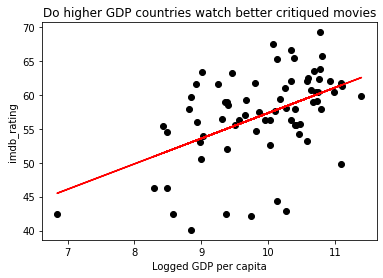

In [67]:
# Scatter plot for Lodge GDP vs imbd Rating
gdp_mean=clean_data.groupby('Country name')['Logged GDP per capita'].agg('mean')
imdb_mean=clean_data.groupby('Country name')['imdb_rating'].agg('mean')
combined = pd.merge(gdp_mean,imdb_mean, how="inner",on="Country name")

plt.title("Do higher GDP countries watch better critiqued movies")
plt.xlabel('Logged GDP per capita')
plt.ylabel('imdb_rating')
plt.scatter(gdp_mean,imdb_mean,color='black')

#linear regrattion
(slope, intercept, rvalue, pvalue, stderr) = linregress(gdp_mean,imdb_mean)
regress_values = gdp_mean * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(gdp_mean,regress_values,"r-")

#finding the correlation
correlation = st.pearsonr(gdp_mean,imdb_mean)
print(f"The correlation between both factors is {round(correlation[0],2)}")

Text(0.5, 1.0, 'Do higher GDP countries watch better critiqued movies')

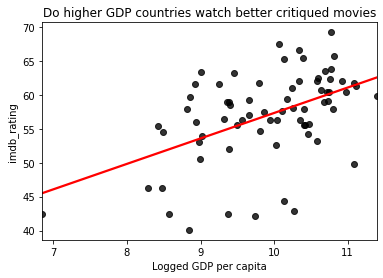

In [68]:
#sns.regplot using seborn

ax = sns.regplot(x="Logged GDP per capita",y="imdb_rating", ci=None,
           data=clean_data, 
                 
        scatter_kws={"color": "black"}, line_kws={"color": "red"});

plt.title("Do higher GDP countries watch better critiqued movies")

In [69]:
st.ttest_ind(gdp_mean, imdb_mean, equal_var=False)

Ttest_indResult(statistic=-59.75492221706206, pvalue=2.3692942761454326e-63)

In [70]:
#highest GDP and Imdb rating
heigst_GPD = selected_df['Logged GDP per capita'].max()
heigst_rating = selected_df['imdb_rating'].max()

print('heigst_GPD:',heigst_GPD)
print('heigest imbd_rating:',heigst_rating)

heigst_GPD: 11.45068073
heigest imbd_rating: 89.0


In [71]:
#Fileterring Higher GDP >10
higher_GDP_cap = selected_df.loc[selected_df["Logged GDP per capita"]>10,[
   "Country name","Regional indicator" ,"Logged GDP per capita","imdb_rating","genre","week","country_code"]]
higher_GDP_cap.head()

,Country name,Regional indicator,Logged GDP per capita,imdb_rating,genre,week,country_code
0,Finland,Western Europe,10.639267,53.0,Adventure,37.0,FIN
1,Finland,Western Europe,10.639267,89.0,Superhero,36.0,FIN
2,Finland,Western Europe,10.639267,61.0,Action,35.0,FIN
3,Finland,Western Europe,10.639267,61.0,Action,34.0,FIN
4,Finland,Western Europe,10.639267,61.0,Comedy,33.0,FIN


In [72]:
#Sort GDP by high to Low
sort_by_high= higher_GDP_cap.sort_values(["Logged GDP per capita"], ascending=False).dropna()
sort_by_high.head()

,Country name,Regional indicator,Logged GDP per capita,imdb_rating,genre,week,country_code
549,Singapore,Southeast Asia,11.395521,53.0,Horror,36.0,SGP
548,Singapore,Southeast Asia,11.395521,55.0,Comedy,37.0,SGP
561,Singapore,Southeast Asia,11.395521,35.0,Romance,24.0,SGP
562,Singapore,Southeast Asia,11.395521,0.0,Unknown,23.0,SGP
563,Singapore,Southeast Asia,11.395521,72.0,Superhero,22.0,SGP


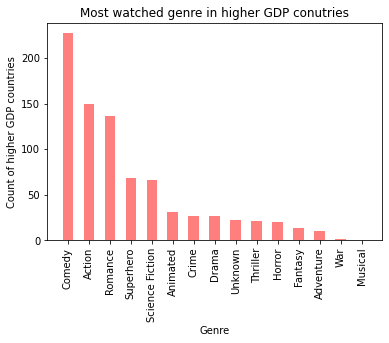

In [73]:
#Comedy is the most watched genre in higher GDP countries
gdp_rating = higher_GDP_cap["genre"].value_counts()
y_axis=gdp_rating.values
x_axis=gdp_rating.index

plt.bar(x_axis,y_axis,color='Red',alpha=0.5, align='center', width = 0.5)
plt.ylabel("Count of higher GDP countries")
plt.xlabel("Genre")
plt.title("Most watched genre in higher GDP conutries")
plt.xticks(rotation=90)
plt.show()